In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from ggplot import *
import re

/home/frankle/anaconda3/envs/gl-env/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/frankle/anaconda3/envs/gl-env/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Import the data

In [2]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('gender_submission.csv')

In [3]:
train_new = train.drop('Survived', axis=1)
full = train_new.append(test, ignore_index=True)

### Exploratory Data Analysis

In [4]:
full

PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
5               6       3                                   Moran, Mr. James   
6               7       1                            McCarthy, Mr. Timothy J   
7               8       3                     Palsson, Master. Gosta Leonard   
8               9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9              10       2                Nasser, Mrs. Nicholas (Adele Achem)   
10             11       3                    Sandstrom, Miss. Marguerite Rut   
11             12       1                           Bonnell, Miss. Elizabeth   
12             13       3                     Saundercock, Mr. William Henry   
13             14       3                        Andersson, Mr. Anders Johan   
14             15       3               Vestrom, Miss. Hulda Amanda Adolfina   
15             16       2                   Hewlett, Mrs. (Mary D Kingcome)    
16             17       3                               Rice, Master. Eugene   
17             18       2                       Williams, Mr. Charles Eugene   
18             19       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19             20       3                            Masselmani, Mrs. Fatima   
20             21       2                               Fynney, Mr. Joseph J   
21             22       2                              Beesley, Mr. Lawrence   
22             23       3                        McGowan, Miss. Anna "Annie"   
23             24       1                       Sloper, Mr. William Thompson   
24             25       3                      Palsson, Miss. Torborg Danira   
25             26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26             27       3                            Emir, Mr. Farred Chehab   
27             28       1                     Fortune, Mr. Charles Alexander   
28             29       3                      O'Dwyer, Miss. Ellen "Nellie"   
29             30       3                                Todoroff, Mr. Lalio   
...           ...     ...                                                ...   
1279         1280       3                               Canavan, Mr. Patrick   
1280         1281       3                        Palsson, Master. Paul Folke   
1281         1282       1                         Payne, Mr. Vivian Ponsonby   
1282         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
1283         1284       3                      Abbott, Master. Eugene Joseph   
1284         1285       2                               Gilbert, Mr. William   
1285         1286       3                           Kink-Heilmann, Mr. Anton   
1286         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
1287         1288       3                               Colbert, Mr. Patrick   
1288         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
1289         1290       3                     Larsson-Rondberg, Mr. Edvard A   
1290         1291       3                           Conlon, Mr. Thomas Henry   
1291         1292       1                            Bonnell, Miss. Caroline   
1292         1293       2                                    Gale, Mr. Harry   
1293         1294       1                     Gibson, Miss. Dorothy Winifred   
1294         1295       1                             Carrau, Mr. Jose Pedro   
1295         1296       1                       Frauenthal, Mr. Isaac Gerald   
1296         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
1297  

/home/frankle/anaconda3/envs/gl-env/lib/python2.7/site-packages/matplotlib/ticker.py:2378: RuntimeWarning: invalid value encountered in double_scalars
  tmin = ((vmin - t0) // minorstep + 1) * minorstep
/home/frankle/anaconda3/envs/gl-env/lib/python2.7/site-packages/matplotlib/ticker.py:2379: RuntimeWarning: invalid value encountered in double_scalars
  tmax = ((vmax - t0) // minorstep + 1) * minorstep


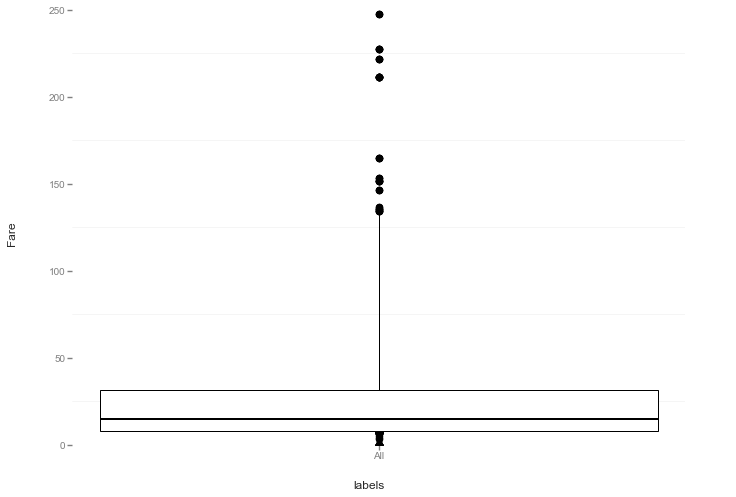

<ggplot: (8727516546705)>

In [5]:
labels = np.repeat(['All'],len(full['Fare']))
bp_data1 = pd.DataFrame({'Fare':list(full['Fare']), 'labels':labels})
ggplot(aes(y='Fare', x='labels'), data=bp_data1) + geom_boxplot() + ylim(0,250) + theme_bw()

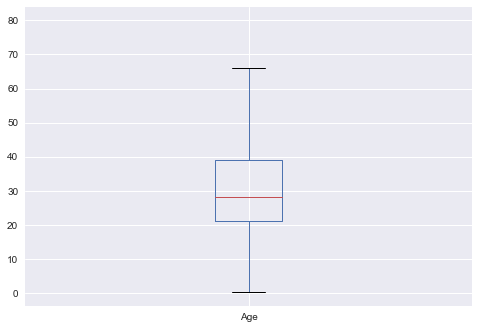

In [6]:
full.boxplot(column='Age')
plt.show()
#train['Age'].value_counts()

In [7]:
full['Cabin'].isnull().sum()

1014

In [8]:
full['Embarked'].isnull().sum()

2

In [9]:
full['Fare'].isnull().sum()

1

In [10]:
full['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [100]:
full['Age'].isnull().sum()

263

### Feature Engineering

In [101]:
#creating a variable called family size
full['fam_size'] = full['SibSp'] + full['Parch'] + 1
full

PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
5               6       3                                   Moran, Mr. James   
6               7       1                            McCarthy, Mr. Timothy J   
7               8       3                     Palsson, Master. Gosta Leonard   
8               9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9              10       2                Nasser, Mrs. Nicholas (Adele Achem)   
10             11       3                    Sandstrom, Miss. Marguerite Rut   
11             12       1                           Bonnell, Miss. Elizabeth   
12             13       3                     Saundercock, Mr. William Henry   
13             14       3                        Andersson, Mr. Anders Johan   
14             15       3               Vestrom, Miss. Hulda Amanda Adolfina   
15             16       2                   Hewlett, Mrs. (Mary D Kingcome)    
16             17       3                               Rice, Master. Eugene   
17             18       2                       Williams, Mr. Charles Eugene   
18             19       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19             20       3                            Masselmani, Mrs. Fatima   
20             21       2                               Fynney, Mr. Joseph J   
21             22       2                              Beesley, Mr. Lawrence   
22             23       3                        McGowan, Miss. Anna "Annie"   
23             24       1                       Sloper, Mr. William Thompson   
24             25       3                      Palsson, Miss. Torborg Danira   
25             26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26             27       3                            Emir, Mr. Farred Chehab   
27             28       1                     Fortune, Mr. Charles Alexander   
28             29       3                      O'Dwyer, Miss. Ellen "Nellie"   
29             30       3                                Todoroff, Mr. Lalio   
...           ...     ...                                                ...   
1279         1280       3                               Canavan, Mr. Patrick   
1280         1281       3                        Palsson, Master. Paul Folke   
1281         1282       1                         Payne, Mr. Vivian Ponsonby   
1282         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
1283         1284       3                      Abbott, Master. Eugene Joseph   
1284         1285       2                               Gilbert, Mr. William   
1285         1286       3                           Kink-Heilmann, Mr. Anton   
1286         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
1287         1288       3                               Colbert, Mr. Patrick   
1288         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
1289         1290       3                     Larsson-Rondberg, Mr. Edvard A   
1290         1291       3                           Conlon, Mr. Thomas Henry   
1291         1292       1                            Bonnell, Miss. Caroline   
1292         1293       2                                    Gale, Mr. Harry   
1293         1294       1                     Gibson, Miss. Dorothy Winifred   
1294         1295       1                             Carrau, Mr. Jose Pedro   
1295         1296       1                       Frauenthal, Mr. Isaac Gerald   
1296         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
1297  

In [102]:
#extracting titles out of names
def match_string(my_str):
    m = re.search(r"(\s)+(\w+)(\.)", my_str)
    return m.group(2)
    
full['Title'] = full['Name'].apply(match_string)

In [14]:
full

PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
5               6       3                                   Moran, Mr. James   
6               7       1                            McCarthy, Mr. Timothy J   
7               8       3                     Palsson, Master. Gosta Leonard   
8               9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9              10       2                Nasser, Mrs. Nicholas (Adele Achem)   
10             11       3                    Sandstrom, Miss. Marguerite Rut   
11             12       1                           Bonnell, Miss. Elizabeth   
12             13       3                     Saundercock, Mr. William Henry   
13             14       3                        Andersson, Mr. Anders Johan   
14             15       3               Vestrom, Miss. Hulda Amanda Adolfina   
15             16       2                   Hewlett, Mrs. (Mary D Kingcome)    
16             17       3                               Rice, Master. Eugene   
17             18       2                       Williams, Mr. Charles Eugene   
18             19       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19             20       3                            Masselmani, Mrs. Fatima   
20             21       2                               Fynney, Mr. Joseph J   
21             22       2                              Beesley, Mr. Lawrence   
22             23       3                        McGowan, Miss. Anna "Annie"   
23             24       1                       Sloper, Mr. William Thompson   
24             25       3                      Palsson, Miss. Torborg Danira   
25             26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26             27       3                            Emir, Mr. Farred Chehab   
27             28       1                     Fortune, Mr. Charles Alexander   
28             29       3                      O'Dwyer, Miss. Ellen "Nellie"   
29             30       3                                Todoroff, Mr. Lalio   
...           ...     ...                                                ...   
1279         1280       3                               Canavan, Mr. Patrick   
1280         1281       3                        Palsson, Master. Paul Folke   
1281         1282       1                         Payne, Mr. Vivian Ponsonby   
1282         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
1283         1284       3                      Abbott, Master. Eugene Joseph   
1284         1285       2                               Gilbert, Mr. William   
1285         1286       3                           Kink-Heilmann, Mr. Anton   
1286         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
1287         1288       3                               Colbert, Mr. Patrick   
1288         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
1289         1290       3                     Larsson-Rondberg, Mr. Edvard A   
1290         1291       3                           Conlon, Mr. Thomas Henry   
1291         1292       1                            Bonnell, Miss. Caroline   
1292         1293       2                                    Gale, Mr. Harry   
1293         1294       1                     Gibson, Miss. Dorothy Winifred   
1294         1295       1                             Carrau, Mr. Jose Pedro   
1295         1296       1                       Frauenthal, Mr. Isaac Gerald   
1296         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
1297  

In [103]:
#getting all unique titles
titles_dic = Counter(list(full['Title']))
titles_list = []

for i in titles_dic:
    titles_list.append(i)
    
print titles_list

['Sir', 'Major', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Dona', 'Jonkheer', 'Countess', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col']


In [104]:
#replacing titles and converting into 4 categories
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms', 'Dona']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
full['Title']=full.apply(replace_titles, axis=1)

In [105]:
new_titles_dict = Counter(full['Title'])
print new_titles_dict

Counter({'Mr': 775, 'Miss': 265, 'Mrs': 208, 'Master': 61})


In [107]:
full.loc[full['Age'].isnull(), 'Age'] = '###' 

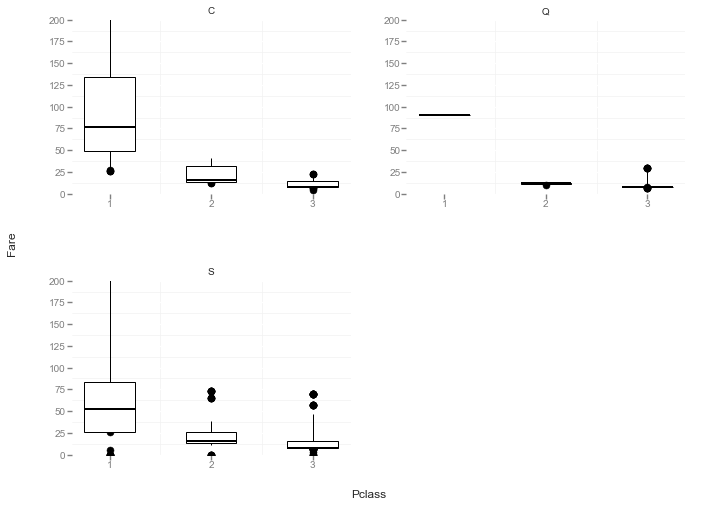

<ggplot: (8727515485705)>

In [19]:
#plot to analyze missing embarked values and fare values
ggplot(aes(x='Pclass',y='Fare'), data=full) +\
    geom_boxplot() +\
    facet_wrap('Embarked', scales='free') +\
    ylim(0,200) + theme_bw()

In [20]:
full[full['Fare'].isnull()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch  \
1043         1044       3  Storey, Mr. Thomas  male  60.5      0      0   

     Ticket  Fare Cabin Embarked  fam_size Title  
1043   3701   NaN   NaN        S         1    Mr

In [21]:
#fill missing fare values
mean_fare_temp = full[(full['Pclass']==3) & (full['Embarked']=='S') & (full['fam_size']==1)]['Fare'].mean()
full.loc[full['Fare'].isnull(),'Fare'] = mean_fare_temp

In [22]:
full[full['Embarked'].isnull()]

PassengerId  Pclass                                       Name     Sex  \
61            62       1                        Icard, Miss. Amelie  female   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  fam_size Title  
61   38.0      0      0  113572  80.0   B28      NaN         1  Miss  
829  62.0      0      0  113572  80.0   B28      NaN         1   Mrs

In [23]:
#from the plots missing values of Embarked potentially looks like C so fill it with them
full.loc[full['Embarked'].isnull(), 'Embarked'] = 'C'

In [24]:
#get the suffix of the ticket
Counter(full['Ticket'])

Counter({'110152': 3,
         '110413': 3,
         '110465': 2,
         '110469': 1,
         '110489': 1,
         '110564': 1,
         '110813': 2,
         '111163': 1,
         '111240': 1,
         '111320': 1,
         '111361': 2,
         '111369': 1,
         '111426': 1,
         '111427': 1,
         '111428': 1,
         '112050': 1,
         '112051': 1,
         '112052': 1,
         '112053': 1,
         '112058': 2,
         '112059': 1,
         '112277': 1,
         '112377': 1,
         '112378': 2,
         '112379': 1,
         '112901': 1,
         '113028': 1,
         '113038': 1,
         '113043': 1,
         '113044': 1,
         '113050': 1,
         '113051': 1,
         '113054': 1,
         '113055': 1,
         '113056': 1,
         '113059': 2,
         '113501': 1,
         '113503': 5,
         '113505': 2,
         '113509': 2,
         '113510': 1,
         '113514': 1,
         '113572': 2,
         '113760': 4,
         '113767': 1,
         '

In [25]:
regex = r"^([a-zA-Z])+(\w*\.*\w*\.*\/*\w+\.*\w*\.*)+"

def get_ticket_prefix(tkt):
    m = re.search(regex, tkt)
    if m is not None:
        return m.group(0)
    else:
        return 'NO_PREF'

full['ticket_prefix'] = full['Ticket'].apply(get_ticket_prefix)

In [26]:
full['ticket_prefix'].value_counts()

NO_PREF       966
PC             92
C.A.           46
SOTON/O.Q.     16
STON/O         14
W./C.          14
A/5            12
CA.            12
SC/PARIS       11
A/5.           10
CA             10
F.C.C.          9
SOTON/OQ        8
STON/O2.        7
S.O.C.          7
S.O./P.P.       7
A/4             6
SC/AH           5
SC/Paris        5
LINE            4
PP              4
A./5.           3
S.C./PARIS      3
F.C.            3
SOTON/O2        3
A.5.            3
A/4.            3
SC              2
WE/P            2
P/PP            2
W.E.P.          2
A4.             1
AQ/4            1
SC/A4           1
S.P.            1
S.C./A.4.       1
SO/C            1
S.O.P.          1
AQ/3.           1
STON/OQ.        1
Fa              1
C.A./SOTON      1
S.W./PP         1
LP              1
SW/PP           1
SCO/W           1
A/S             1
SC/A.3          1
W/C             1
Name: ticket_prefix, dtype: int64

###### Dealing with missing Cabin and filling cabin

In [30]:
full['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
B96 B98            4
F2                 4
F4                 4
C78                4
F33                4
C22 C26            4
B58 B60            3
E101               3
B51 B53 B55        3
C101               3
A34                3
E34                3
C68                2
C7                 2
C62 C64            2
E25                2
C92                2
C93                2
B77                2
B78                2
E24                2
E50                2
B35                2
D10 D12            2
C2                 2
E121               2
                  ..
A23                1
A26                1
A29                1
B24                1
C105               1
B4                 1
C128               1
D45                1
D6                 1
B3                 1
C53                1
E58                1
D34                1
B102               1
A32                1
E17                1
A16          

In [85]:
full.loc[full['Cabin'].isnull(), 'Cabin'] = '###UNKNOWN'

regex = r"^([a-zA-Z]{1})"
def get_cabin_prefix(cabin):
    m = re.search(regex, cabin)
    if m is not None:
        return m.group(1)
    else:
        return 'UNKNOWN'
    
full['Cabin_prefix'] = full['Cabin'].apply(get_cabin_prefix)

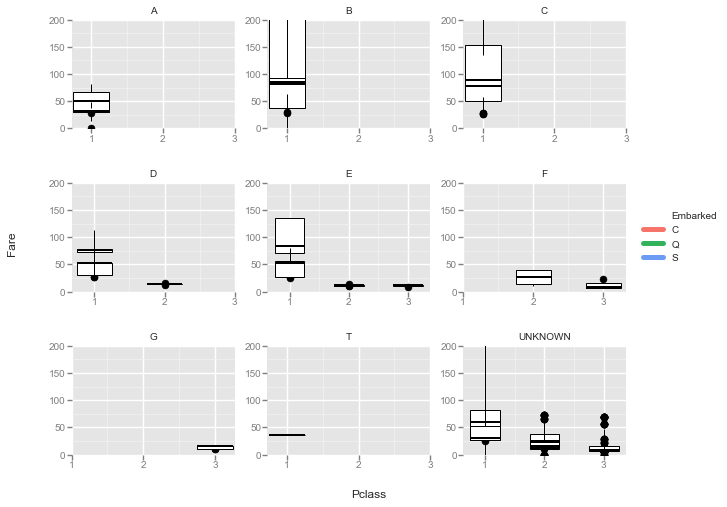

<ggplot: (8727509288101)>

In [45]:
ggplot(aes(x='Pclass', y='Fare', color='Embarked'), data=full) + geom_boxplot(alpha=0.5) +\
    facet_wrap('Cabin_prefix', scales='free') +\
    ylim(0,200)

In [90]:
full['Cabin_prefix'].value_counts()

UNKNOWN    584
F          256
G          114
C          104
B           74
A           67
E           63
D           46
T            1
Name: Cabin_prefix, dtype: int64

In [87]:
full['Cabin_prefix'].isnull().sum()

0

In [89]:
def fill_unknown_cabin_prefix(zzz):
    cbn_pfx = zzz['Cabin_prefix']
    pcls = zzz['Pclass']
    fr = zzz['Fare']
    fam_sz = zzz['fam_size']
    embk = zzz['Embarked']
    if cbn_pfx == 'UNKNOWN':
        if pcls == 1:
            if fr > 25 and fr < 70:
                return 'A'
            elif fr > 150:
                return 'B'
            elif fr > 70 and fr < 150:
                return 'C'
            else:
                return 'E'
        elif pcls == 2:
            if fr >10 and fr < 45:
                return 'F'
            else:
                return 'E'
        else:
            if fr > 10 and fr < 20:
                return 'G'
            else:
                return 'UNKNOWN'
    else:
        return cbn_pfx
            
full['Cabin_prefix'] = full.apply(fill_unknown_cabin_prefix, axis=1)                

### Create new csv of cleaned data for now

In [91]:
test_cleaned = full.iloc[891:]
train_cleaned = full.iloc[:891]

In [92]:
test_cleaned = test_cleaned.reset_index(drop=True)

In [93]:
test_cleaned.to_csv("test_cleaned.csv",sep=",",index=False)

In [94]:
train_labels = train[['PassengerId', 'Survived']]

In [95]:
train_cleaned = train_cleaned.merge(train_labels, on="PassengerId")

In [96]:
train_cleaned.to_csv("train_cleaned.csv", sep=",", index=False)